# Homework Assignment 1 - (Question 4)

## <u>Case Study</u>: Artificial Netflix Movie Ratings Dataset

The dataset that will be examining is an artificially generated dataset of 150 Netflix users and their average rating (on a scale from [0,5], where 0=strongly dislike and 5=strongly like) for movies of five different genres: horror, romance, drama, comedy, and documentaries.

In this analysis we would like to answer the following questions about the dataset.
1. Is this dataset clusterable?
2. If so, how many clusters are there in the dataset?
3. What kind of movies do the users in each cluster like and dislike?




### Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
np.random.seed(42)

### 4.1. Read the csv [1 pt]
Read the artificial_netflix_ratings.csv into a dataframe. Call it df.

In [54]:
df = pd.read_csv('artificial_netflix_ratings.csv')

### 4.2. Examining the dataframe. [1 pt]

Show the first five rows of the dataframe df.

In [55]:
df.head(5)

,horror,romance,drama,comedy,documentaries
0,2.701137,3.547034,3.004323,2.739230,2.060151
1,3.994819,2.721366,2.868647,4.738209,0.364445
2,0.539065,0.155385,4.338865,3.891659,4.369384
3,2.811313,3.611991,2.928161,2.828290,2.250514
4,2.811637,3.529473,3.142484,2.719070,2.182515


### 4.3. Describing the dataframe. [2 pt]

Create a histogram for each of the five attributes in the dataset.

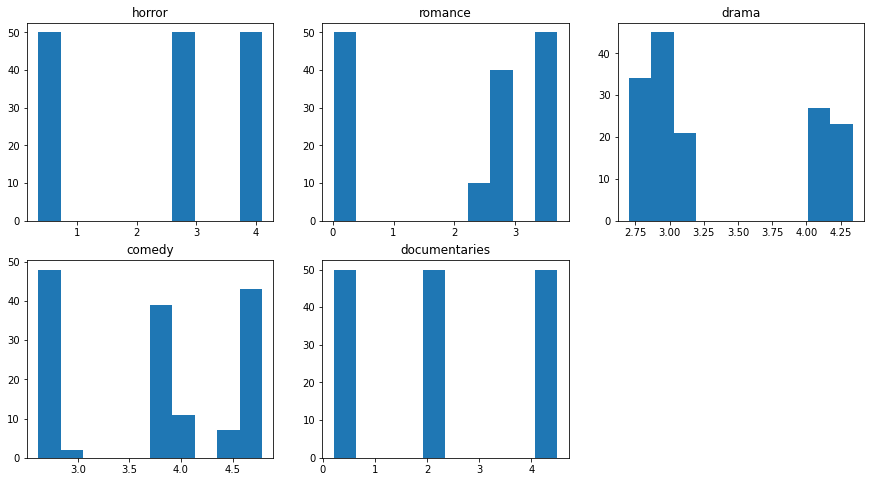

In [56]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.title(df.columns[0])
plt.hist(df[df.columns[0]])

plt.subplot(2,3,2)
plt.title(df.columns[1])
plt.hist(df[df.columns[1]])

plt.subplot(2,3,3)
plt.title(df.columns[2])
plt.hist(df[df.columns[2]])

plt.subplot(2,3,4)
plt.title(df.columns[3])
plt.hist(df[df.columns[3]])

plt.subplot(2,3,5)
plt.title(df.columns[4])
plt.hist(df[df.columns[4]])

plt.show()

### 4.4. Dataset for clustering [1 pt]

Create a copy of this **df** dataframe and call it **X**.

In [57]:
X = df.copy()

### 4.5. Create an elbow plot for this dataframe X. [2 pt]

In [58]:
avg_inertia_mapping = {}
for k in range(10):
    sub_inertia_list = []
    for i in range(0,3):
        kmeans = KMeans(n_clusters=k+1).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia = np.average(sub_inertia_list)
    avg_inertia_mapping.update({k+1:avg_inertia})
    print(f'k = {k+1} ; Avg. inertia = {avg_inertia}')

k = 1 ; Avg. inertia = 1179.3836899174435
k = 2 ; Avg. inertia = 227.21704980402149
k = 3 ; Avg. inertia = 2.7230638035777086
k = 4 ; Avg. inertia = 2.5045274292331254
k = 5 ; Avg. inertia = 2.299164847080014
k = 6 ; Avg. inertia = 2.137233868370858
k = 7 ; Avg. inertia = 1.9973873520178058
k = 8 ; Avg. inertia = 1.9023764838925936
k = 9 ; Avg. inertia = 1.8131757472319698
k = 10 ; Avg. inertia = 1.7330183740658551


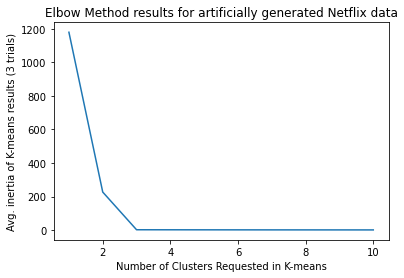

In [59]:
plt.plot(avg_inertia_mapping.keys(), avg_inertia_mapping.values())
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Avg. inertia of K-means results (3 trials)')
plt.title('Elbow Method results for artificially generated Netflix data')
plt.show()

### 4.6. Does this elbow plot suggest that the dataset is clusterable? Explain. [2 pt]

- The plot does suggest that the dataset is clusterable.
- The average inertia (or within cluster sum of squares) reduces very drastically when we choose K = 3. It almost becomes zero at K=3.
- There is a sudden decrease in the average inertia values and then a very slow reduction of avg. inertia after K=3.

### 4.7. How many clusters does this elbow plot suggest we should use in k-means? Explain. [2 pt]

- The plot suggests that we should use 3 clusters.

### 4.8. Cluster the data [2 pt]

Using the cluster number that you selected in question above, clusters the dataframe using k-means.

**<u>Note</u>: In sklearn, you can set a random seed for non-deterministic functions by using the random_state parameter. Within your KMeans() function in this problem, you should set an additional parameter with <u>random_state=100</u>.**

Save the cluster labels of your final clustering in a new column of the **df** dataframe called 'predicted_cluster'.



In [67]:
kmeans = KMeans(n_clusters=3, random_state=100).fit(X)
kmeans

KMeans(n_clusters=3, random_state=100)

In [69]:
kmeans.labels_

array([0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2])

In [72]:
df['Predicted_cluster'] = kmeans.labels_

In [73]:
df.head()

,horror,romance,drama,comedy,documentaries,Predicted_cluster
0,2.701137,3.547034,3.004323,2.739230,2.060151,0
1,3.994819,2.721366,2.868647,4.738209,0.364445,2
2,0.539065,0.155385,4.338865,3.891659,4.369384,1
3,2.811313,3.611991,2.928161,2.828290,2.250514,0
4,2.811637,3.529473,3.142484,2.719070,2.182515,0


### 4.9 Create side-by-side boxplots visualizations. [3 pt]

For each of the five movie attributes (horror, romance, drama, comedy, and documentaries) create a side-by-side boxplots visualization. Within each visualization, there should be a boxplot that corresponds to each predicted_cluster label.

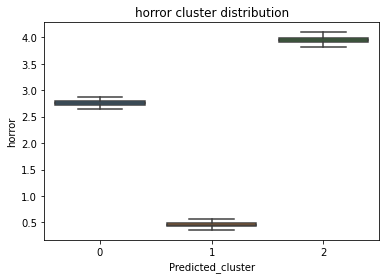

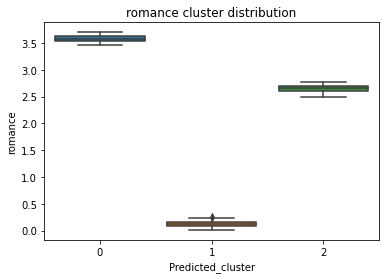

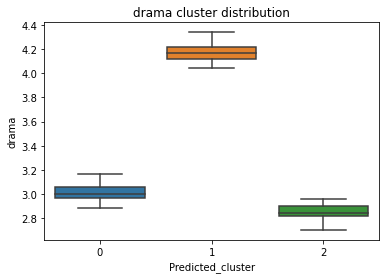

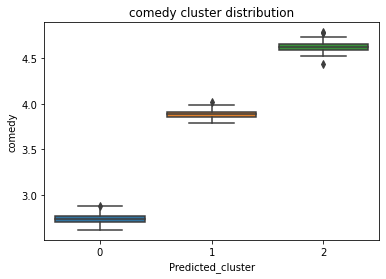

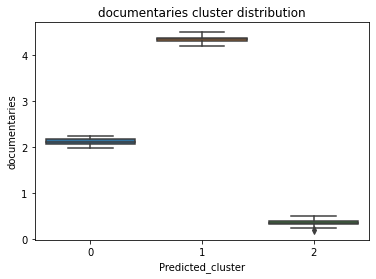

In [76]:
for col in df.columns[:-1]:
    sns.boxplot(x='Predicted_cluster', y=col, data=df)
    plt.title(f'{col} cluster distribution')
    plt.show()

### 4.10. Describing the clusters [2 pt]

What kind of movies do the users in each cluster like (compared to users in some other clusters)? What kind of movies do the users in each cluster dislike (compared to users in some other clusters)?

- Kind of Movies that users in each cluster like:
    - Cluster 0: Romance with average liking for documentaries, Horror
    - Cluster 1: Documentaries, Drama with average liking for comedy
    - Cluster 2: Comedy and Horror with average liking ro romance
    

- Kind of Movies that users in each clusters dislike:
    - Cluster 0: Drama, Comedy
    - Cluster 1: Romance, Horror
    - Cluster 2: Documentaries, Drama